In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

sb.set()

pd.options.display.max_rows = 999

In [2]:
life_filled=pd.read_csv("dataset/life_filled.csv")
life_filled.drop(columns=life_filled.columns[0],axis=1,inplace=True)
print("Data dimensions",life_filled.shape)
life_filled.head()

Data dimensions (2938, 21)


COUNTRY      STATUS    YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
0  Afghanistan  Developing  2015.0             65.0             26.3   
1  Afghanistan  Developing  2014.0             59.9             27.1   
2  Afghanistan  Developing  2013.0             59.9             26.8   
3  Afghanistan  Developing  2012.0             59.5             27.2   
4  Afghanistan  Developing  2011.0             59.2             27.5   

   INFANT_DEATHS  ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B  MEASLES  ...  \
0            6.2     0.01               71.279624         65.0    115.4  ...   
1            6.4     0.01               73.523582         62.0     49.2  ...   
2            6.6     0.01               73.219243         64.0     43.0  ...   
3            6.9     0.01               78.184215         67.0    278.7  ...   
4            7.1     0.01                7.097109         68.0    301.3  ...   

   UNDER_FIVE_DEATHS  POLIO  TOTAL_EXPENDITURE  DIPHTHERIA  HIV/AIDS  \
0                8.3    6.0               8.16        65.0      0.01   
1                8.6   58.0               8.18        62.0      0.01   
2                8.9   62.0               8.13        64.0      0.01   
3                9.3   67.0               8.52        67.0      0.01   
4                9.7   68.0               7.87        68.0      0.01   

          GDP  POPULATION  THINNESS_5_to_19_YEARS  \
0  584.259210  33736494.0                    34.5   
1  612.696514    327582.0                    35.0   
2  631.744976  31731688.0                    35.4   
3  669.959000   3696958.0                    35.9   
4   63.537231   2978599.0                    36.4   

   INCOME_COMPOSITION_OF_RESOURCES  SCHOOLING  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 21 columns]

*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

# BASIC EDA
using life_filled dataframe

### Numeric variables based on percentages

we first explore numeric variables, we seperate out those based on percentages vs those with actual quantities

In [3]:
life_filled[["PERCENTAGE_EXPENDITURE","HEPATITIS_B","POLIO","TOTAL_EXPENDITURE","DIPHTHERIA","THINNESS_5_to_19_YEARS","ADULT_MORTALITY","INFANT_DEATHS","MEASLES","UNDER_FIVE_DEATHS","HIV/AIDS"]].describe()


PERCENTAGE_EXPENDITURE  HEPATITIS_B        POLIO  TOTAL_EXPENDITURE  \
count             2938.000000  2938.000000  2938.000000        2938.000000   
mean              3333.452964    75.170445    82.339751           6.981586   
std               5461.761692    25.786149    23.503008           4.460736   
min                  0.000000     0.000000     3.000000           0.370000   
25%                 50.549554    56.000000    77.000000           4.370000   
50%                322.177866    87.000000    93.000000           5.950000   
75%               4608.350477    96.000000    97.000000           8.190000   
max              22283.707841    99.000000    99.000000          30.745757   

        DIPHTHERIA  THINNESS_5_to_19_YEARS  ADULT_MORTALITY  INFANT_DEATHS  \
count  2938.000000             2938.000000      2938.000000    2938.000000   
mean     82.115991                9.939140        16.531808      12.636635   
std      23.785436                9.026404        12.447696      18.186081   
min       2.000000                0.200000         0.100000       0.000000   
25%      78.000000                3.200000         7.400000       0.400000   
50%      93.000000                6.900000        14.400000       2.800000   
75%      97.000000               14.500000        22.800000      29.255802   
max      99.000000               56.300000        72.300000     180.000000   

            MEASLES  UNDER_FIVE_DEATHS     HIV/AIDS  
count   2938.000000        2938.000000  2938.000000  
mean     241.959224          16.486052     0.174210  
std     1146.727249          24.106069     0.507778  
min        0.000000           0.100000     0.010000  
25%        0.000000           0.400000     0.010000  
50%        1.700000           3.400000     0.010000  
75%       36.025000          38.261467     0.080000  
max    21218.300000         250.000000     5.060000

Remarks:
- We are **not sure** why `PERCENTAGE_EXPENDITURE` on average is higher than `100%`, even though the data mentioned that it is based on 100% ❓❓❓❓
- `HEPATITIS_B` immunization rates are quite high across all countries with the mean and median both around `80%`
- similarly for `POLIO` immunization rates it is also quite high at around `80-90%`
- For `TOTAL_EXPENDITURE` as percentage of government expenditure it is around 6% devoted to healthcare on average
- For `DIPHTHERIA` it is also a measure of immunization rates so it is also around `80-90%` on average
- For combined `THINNESS_5_to_19_YEARS` the mean `9.66%` is noticeably higher than median `7.27%` so the distribution is probably positively skewed
- for `HIV/AIDS` it seems very uneven and highly skewed, with the mean being significantly higher than median, this makes sense as a few countries are very heavily affected by `HIV/AIDS`.
- for `MEASLES` distribution seems very uneven and highly skewed, probably for the same reasons as above
- for `UNDER_FIVE_DEATHS` distribution seems very uneven and highly skewed, probably for the same reasons as `HIV/AIDS`
- for `INFANT_DEATHS`the distribution seems very skewed, with the mean being significantly higher than median
- for `ADULT_MORTALITY` the distribution seems quite skewed, with the mean being much higher than median, but all are reasonable, considering it measures percentage of deaths between 15 and 60 years of age in population

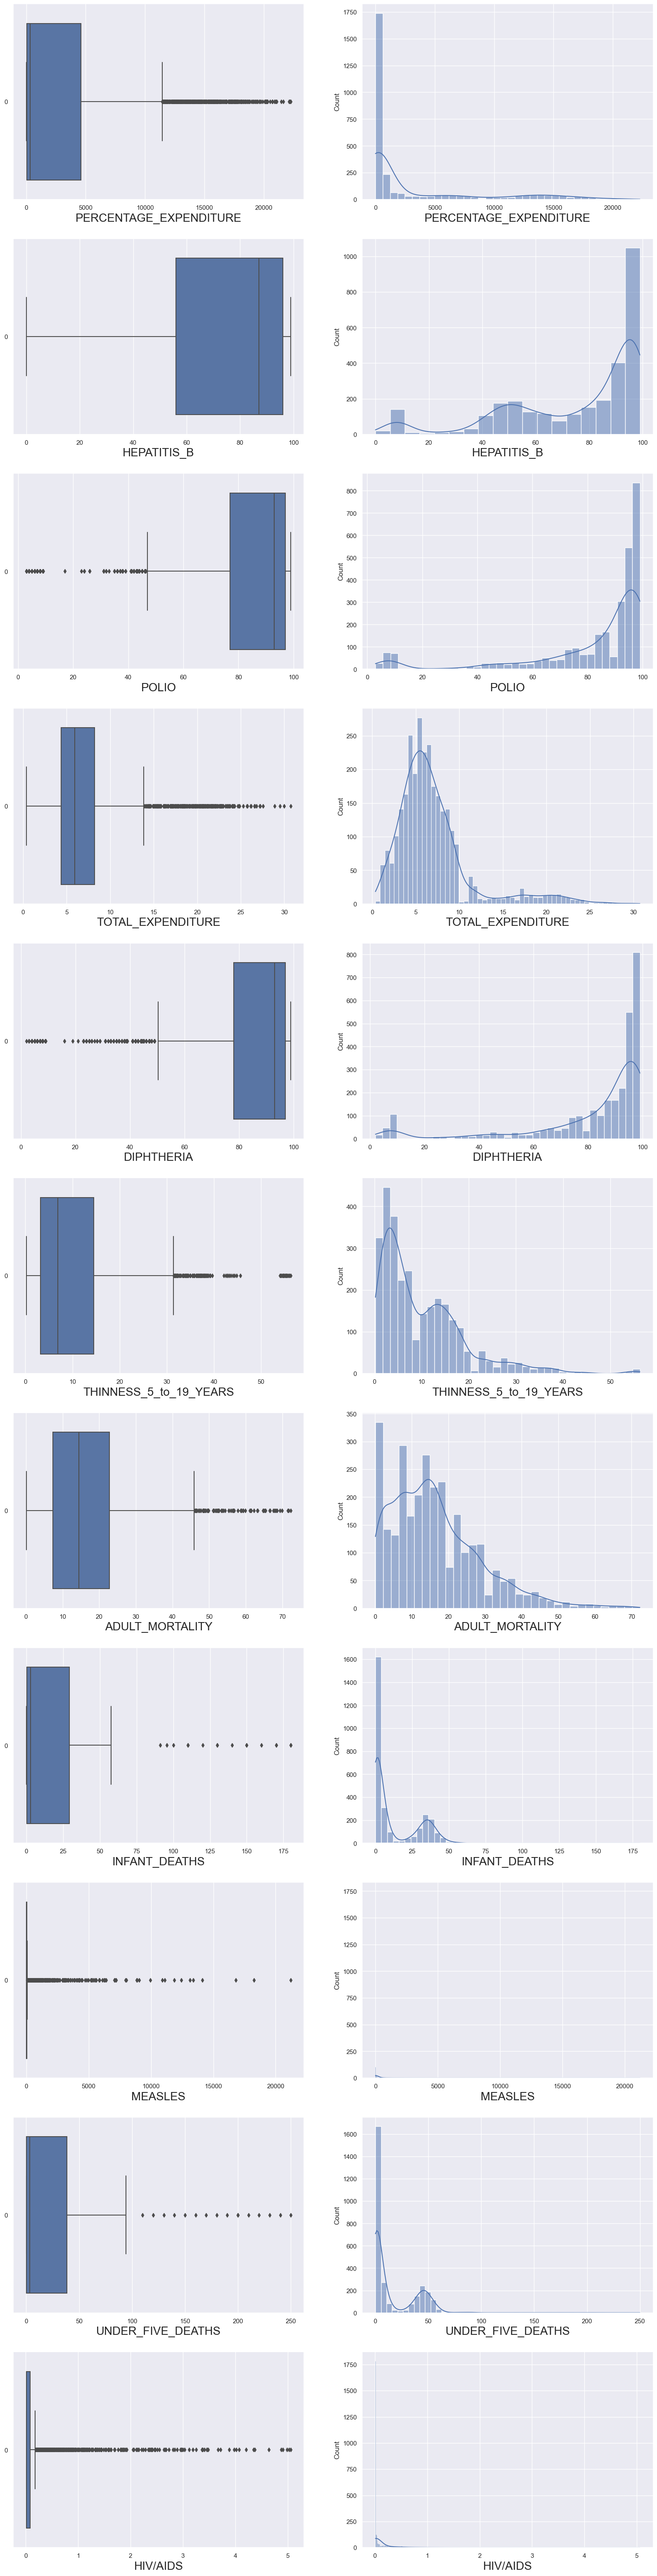

In [4]:
f, axes = plt.subplots(11, 2, figsize=(20, 80))
tmp=life_filled[["PERCENTAGE_EXPENDITURE","HEPATITIS_B","POLIO","TOTAL_EXPENDITURE","DIPHTHERIA","THINNESS_5_to_19_YEARS","ADULT_MORTALITY","INFANT_DEATHS","MEASLES","UNDER_FIVE_DEATHS","HIV/AIDS"]]


count = 0
for var in tmp:
    sb.boxplot(data = life_filled[var], orient = "h", ax = axes[count,0])
    sb.histplot(data=life_filled[var], ax=axes[count,1],kde=True)
    ax1=axes[count,0]
    ax2=axes[count,1]
    ax1.set_xlabel(var,fontsize=20)
    ax2.set_xlabel(var,fontsize=20)
    count += 1
plt.show()

- We only notice some potential problems for `PERCENTAGE_EXPENDITURE`, which is contains large number of very low values and some very high values, the distribution is extremely wide, needs further exploration
- for `THINNESS_5_to_19_YEARS` the distribution is bimodal, with a lot of countries having very low percentages and another peak at 15%

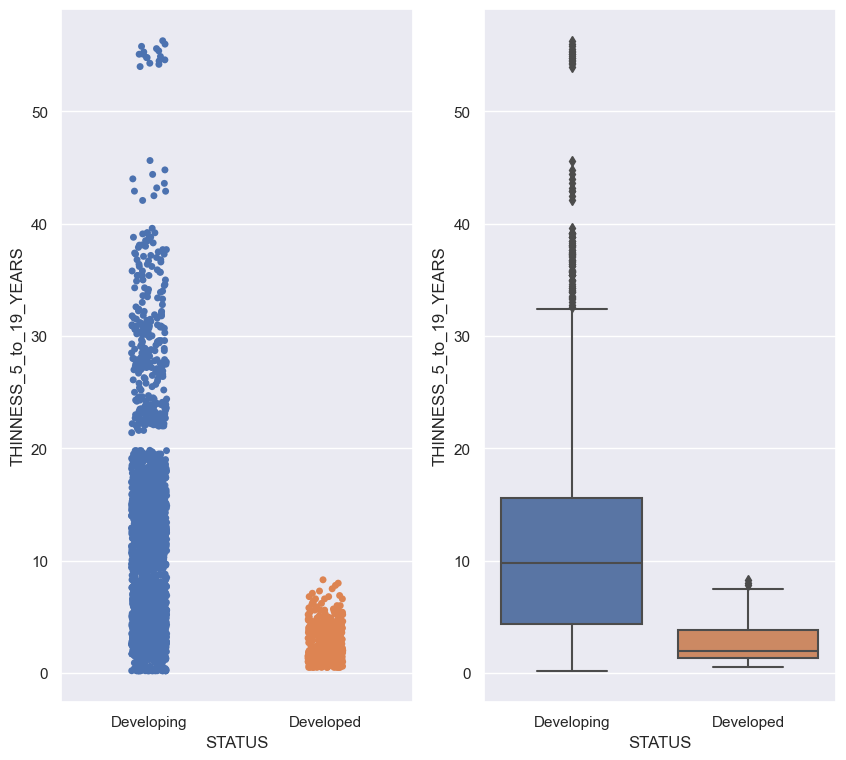

In [5]:
f, axes = plt.subplots(1, 2, figsize=(10, 9))
sb.stripplot(x = 'STATUS', y = 'THINNESS_5_to_19_YEARS', data = life_filled,ax=axes[0])
sb.boxplot(x = 'STATUS', y = 'THINNESS_5_to_19_YEARS', data = life_filled,ax=axes[1])
plt.show()

After seperating out the `THINNESS_5_to_19_YEARS` into developing vs developed it becomes a lot more clear, the percentage of `THINNESS_5_to_19_YEARS` in developed countries is **significantly lower** at around `2-3%`, where for developing countries it is more around `10%` which is consistent with what we expected

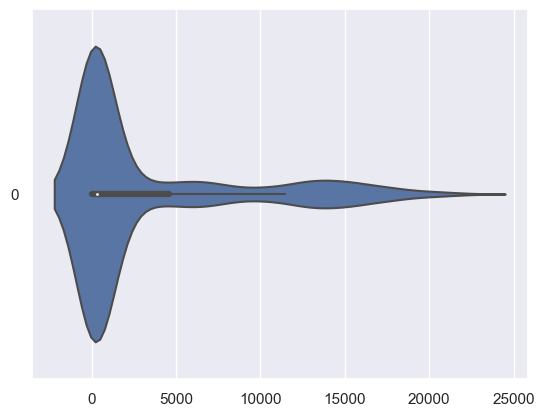

In [6]:
sb.violinplot(data=life_filled['PERCENTAGE_EXPENDITURE'],orient='h')
plt.show()

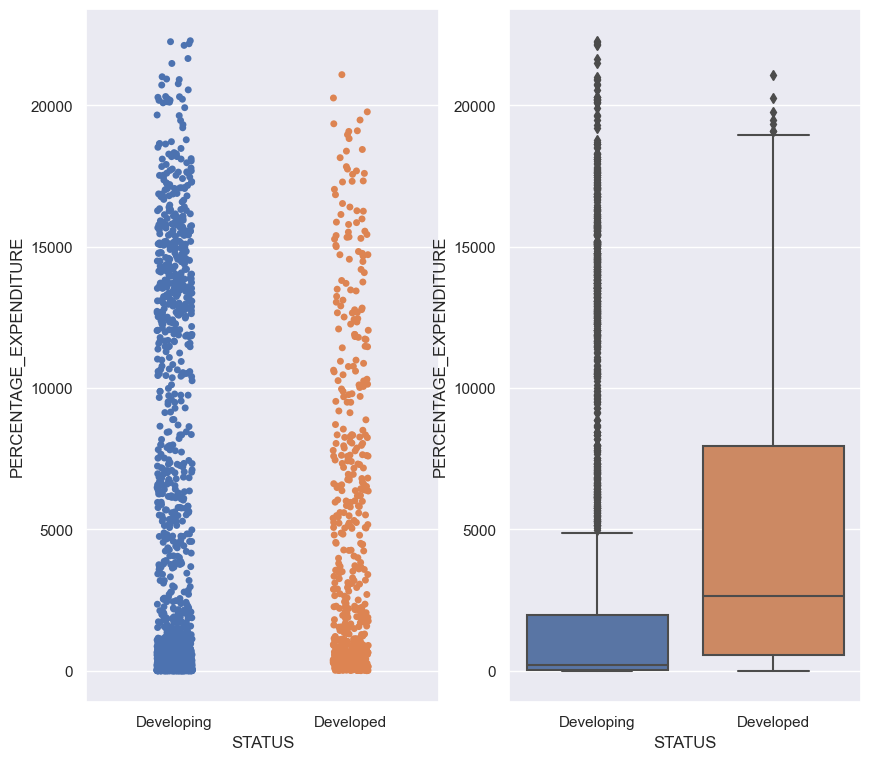

In [7]:
f, axes = plt.subplots(1, 2, figsize=(10, 9))
sb.stripplot(x = 'STATUS', y = 'PERCENTAGE_EXPENDITURE', data = life_filled,ax=axes[0])
sb.boxplot(x = 'STATUS', y = 'PERCENTAGE_EXPENDITURE', data = life_filled,ax=axes[1])
plt.show()

once again the distribution of `PERCENTAGE_EXPENDITURE` is extremely wide. It is bimodal and has a huge number of very high low percentages and very high percentages. Among `Developing` countries most have very low `PERCENTAGE_EXPENDITURE` but it varys widely, as seen by the large number of outliers. For `Developed` countries they have a much higher`PERCENTAGE_EXPENDITURE` as expected, although the spread is still wide.

### The rest of Numeric variables

In [8]:
life_filled[["SCHOOLING","INCOME_COMPOSITION_OF_RESOURCES","POPULATION","GDP","BMI","ALCOHOL","LIFE_EXPECTANCY"]].describe()

SCHOOLING  INCOME_COMPOSITION_OF_RESOURCES    POPULATION  \
count  2938.000000                      2938.000000  2.938000e+03   
mean     12.340658                         0.629447  6.347477e+07   
std       3.649192                         0.206221  1.282816e+08   
min       0.000000                         0.000000  0.000000e+00   
25%      10.300000                         0.502000  2.893995e+05   
50%      12.500000                         0.676000  2.872581e+06   
75%      14.600000                         0.775000  3.192534e+07   
max      26.135726                         0.948000  1.293859e+09   

                 GDP          BMI      ALCOHOL  LIFE_EXPECTANCY  
count    2938.000000  2938.000000  2938.000000      2938.000000  
mean    20742.765497    38.790629     5.925333        69.240764  
std     34611.802858    20.485912     6.543692         9.538927  
min         1.681350     1.000000     0.010000        36.300000  
25%       580.486996    19.400000     1.082500        63.125000  
50%      3116.561755    43.900000     4.155000        72.100000  
75%     19482.273660    56.400000     8.740000        75.700000  
max    152400.152926   116.135422    39.570853        91.933283

- for `SCHOOLING` both the mean and the median is around `12` years, which is a reasonable number
- for `INCOME_COMPOSITION_OF_RESOURCES` both the mean and the median is around `0.67`
- for `POPULATION` the average population of a country from this dataset is around `7million`
- for `GDP` the distribution seems very uneven and highly skewed, with the mean being significantly higher than median
- for `LIFE_EXPECTANCY` with average of around `70` years of age which is reasonable
- for `ALCOHOL` both the mean and the median is around `5` liters per year per capita, which seems like a reasonable number

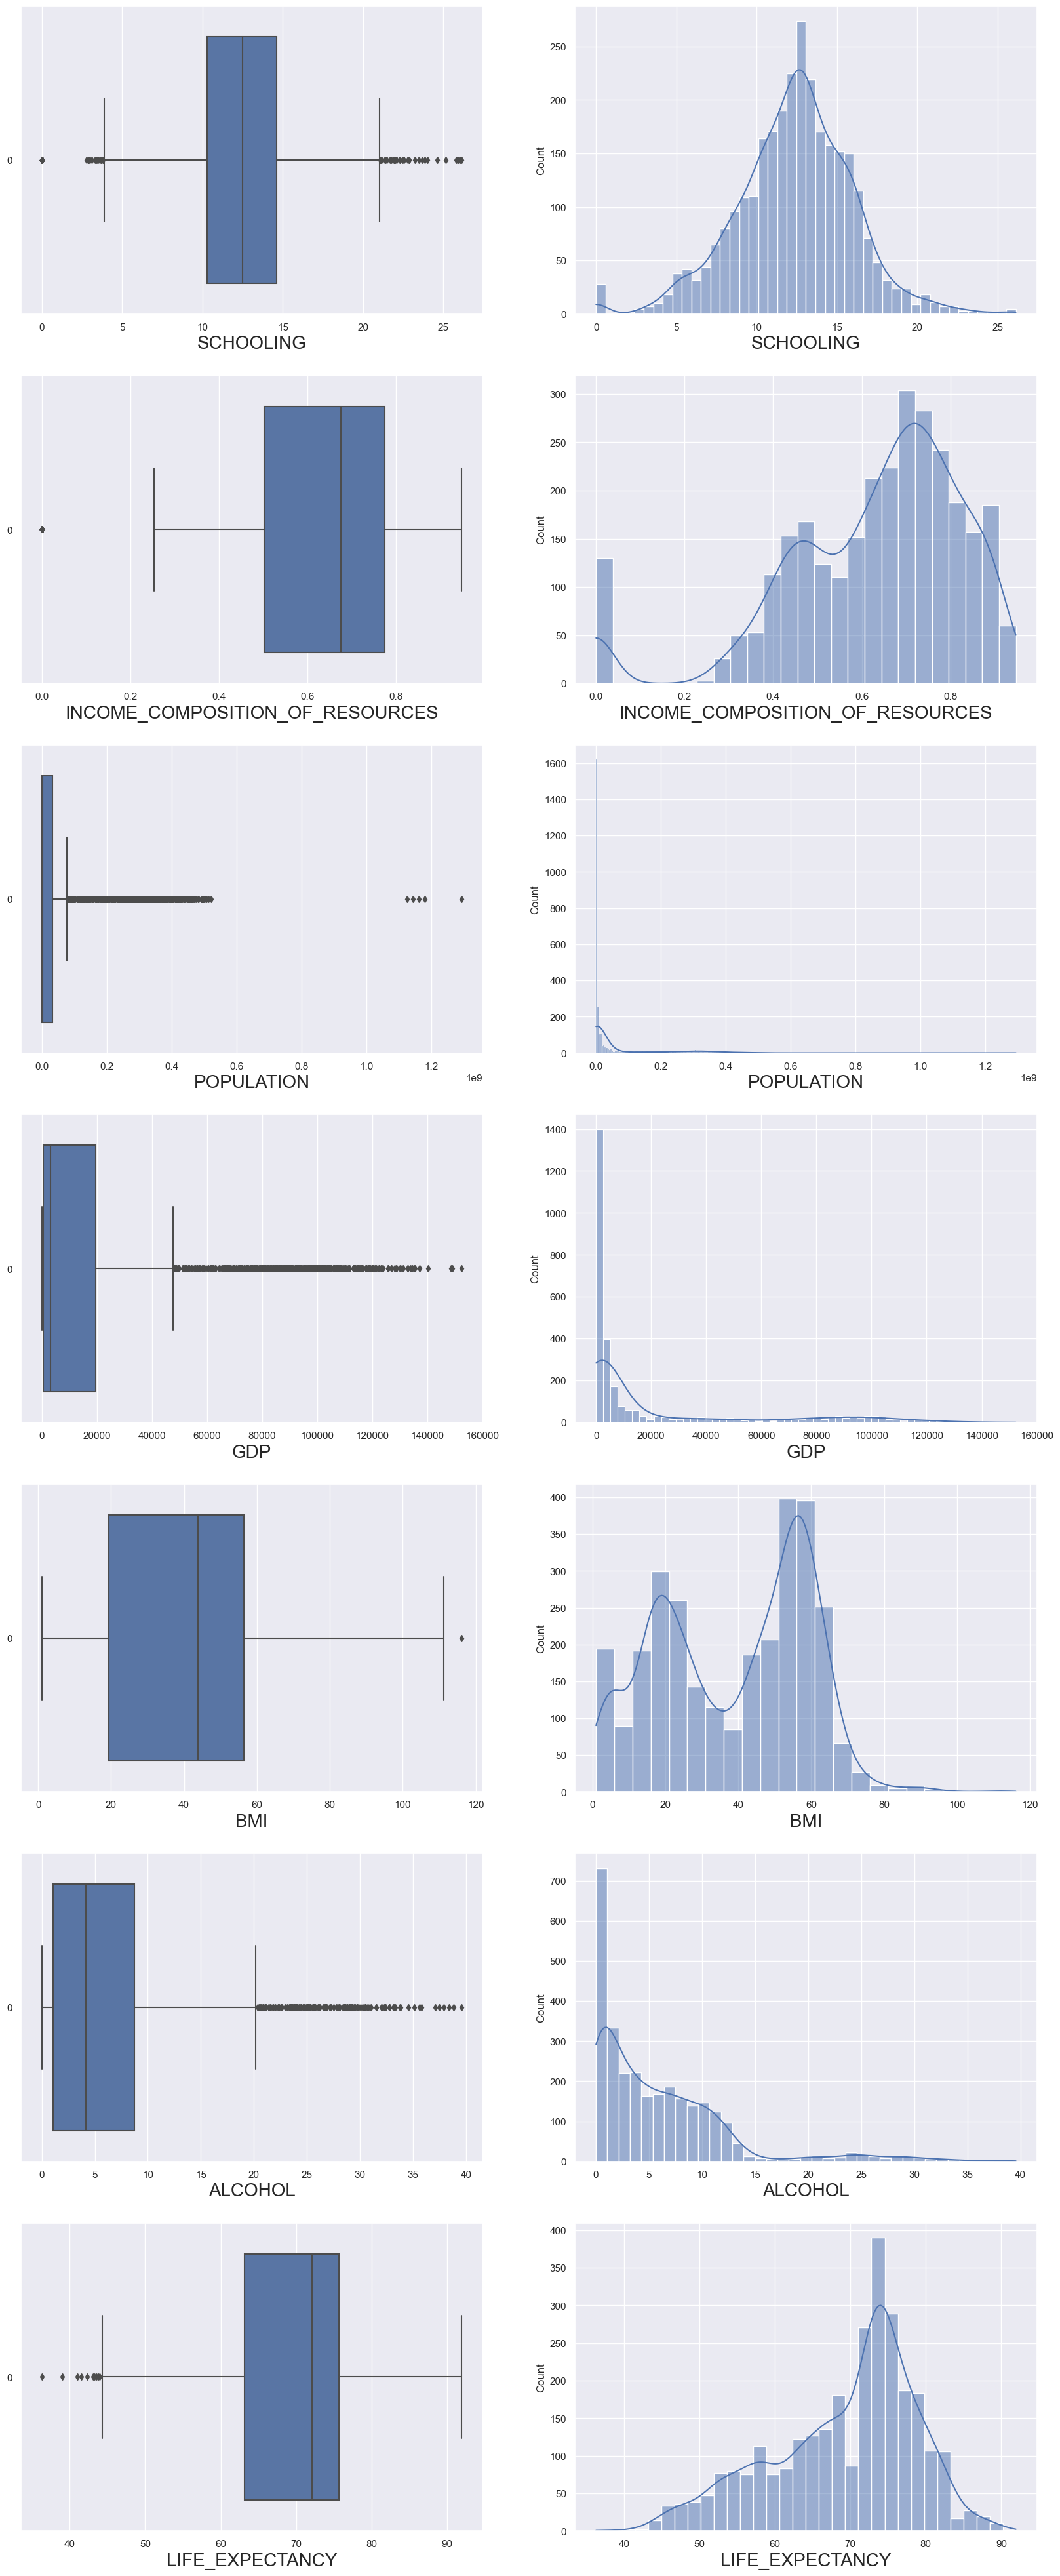

In [9]:
f, axes = plt.subplots(7, 2, figsize=(20, 50))
tmp=life_filled[["SCHOOLING","INCOME_COMPOSITION_OF_RESOURCES","POPULATION","GDP","BMI","ALCOHOL","LIFE_EXPECTANCY"]]

count = 0
for var in tmp:
    sb.boxplot(data = life_filled[var], orient = "h", ax = axes[count,0])
    sb.histplot(data=life_filled[var], ax=axes[count,1],kde=True)
    ax1=axes[count,0]
    ax2=axes[count,1]
    ax1.set_xlabel(var,fontsize=20)
    ax2.set_xlabel(var,fontsize=20)
    count += 1
plt.show()

After looking at distributions for many of the highly skewed features like `POPULATION`, `GDP`, as well as the illness and disease related `MEASLES`, `HIV/AIDS`, `INFANT_DEATHS`, `UNDER_FIVE_DEATHS` are expectedly highly skewed, as this highlights the **major disparity** between healthcare standards and illness rates between some of the most improvished nations and the most developed nations. However we will need to **take note of these uneven distributions during our machine learning.**

## Aggregated dataframe

We will create a aggregated row **using MEAN** for each country over the years, by removing the year variable for ease of comparison between countries, call it life_agg, just for EDA

In [10]:
unique_countries=pd.Series(life_filled["COUNTRY"].unique())
life_agg=life_filled[0:0] #empty new dataframe with only header
for country in unique_countries:
    extract=life_filled[life_filled["COUNTRY"]==country]
    newrow={}
    for col in extract.columns:
        if extract[col].dtype != 'object' and col != 'YEAR':
            newrow[col]=extract[col].mean()
        else:
            newrow[col]=extract[col].unique() #just take out the first row, the name of the country, since all rows the same
    newrow=pd.DataFrame(newrow,index=range(16))
    life_agg=pd.concat([life_agg,pd.DataFrame(newrow.iloc[[0]])])
life_agg=life_agg.drop(['YEAR'],axis=1) #remove the year column
life_agg.index=range(193)
life_agg

COUNTRY      STATUS  \
0                                          Afghanistan  Developing   
1                                              Albania  Developing   
2                                              Algeria  Developing   
3                                               Angola  Developing   
4                                  Antigua and Barbuda  Developing   
5                                            Argentina  Developing   
6                                              Armenia  Developing   
7                                            Australia   Developed   
8                                              Austria   Developed   
9                                           Azerbaijan  Developing   
10                                             Bahamas  Developing   
11                                             Bahrain  Developing   
12                                          Bangladesh  Developing   
13                                            Barbados  Developing   
14                                             Belarus  Developing   
15                                             Belgium   Developed   
16                                              Belize  Developing   
17                                               Benin  Developing   
18                                              Bhutan  Developing   
19                    Bolivia (Plurinational State of)  Developing   
20                              Bosnia and Herzegovina  Developing   
21                                            Botswana  Developing   
22                                              Brazil  Developing   
23                                   Brunei Darussalam  Developing   
24                                            Bulgaria   Developed   
25                                        Burkina Faso  Developing   
26                                             Burundi  Developing   
27                                       Côte d'Ivoire  Developing   
28                                          Cabo Verde  Developing   
29                                            Cambodia  Developing   
30                                            Cameroon  Developing   
31                                              Canada  Developing   
32                            Central African Republic  Developing   
33                                                Chad  Developing   
34                                               Chile  Developing   
35                                               China  Developing   
36                                            Colombia  Developing   
37                                             Comoros  Developing   
38                                               Congo  Developing   
39                                        Cook Islands  Developing   
40                                          Costa Rica  Developing   
41                                             Croatia   Developed   
42                                                Cuba  Developing   
43                                              Cyprus   Developed   
44                                             Czechia   Developed   
45               Democratic People's Republic of Korea  Developing   
46                    Democratic Republic of the Congo  Developing   
47                                             Denmark   Developed   
48                                            Djibouti  Developing   
49                                            Dominica  Developing   
50                                  Dominican Republic  Developing   
51                                             Ecuador  Developing   
52                                               Egypt  Developing   
53                                         El Salvador  Developing   
54                                   Equatorial Guinea  Developing   
55                                             Eritrea  Developing   
56                                             Estonia  D

### Categorial variables

we shall explore categorial variables seperately from numeric data

In [11]:
life_agg.select_dtypes(include="object").describe()

COUNTRY      STATUS
count           193         193
unique          193           2
top     Afghanistan  Developing
freq              1         161

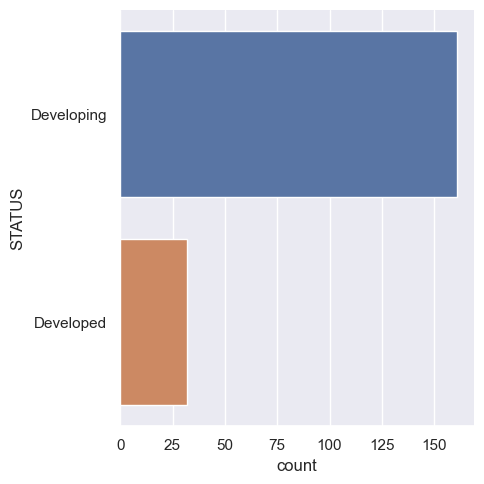

In [12]:
sb.catplot(y='STATUS',data=life_agg,kind="count")
plt.show()

- From here we confirm that there are indeed `193` unique countries
- For the status, most, `161` are Developing countries, with only `193 - 161 = 32` Developed countries
- The ratio of developed to developing countries is **highly imbalanced**, so **classification models may have problems** unless we fix this

## Gathering insights from rankings

In [24]:
print("Top 10 Countries with Highest Life Expectancy")
life_agg.nlargest(10,"LIFE_EXPECTANCY")[['COUNTRY','LIFE_EXPECTANCY']]

Top 10 Countries with Highest Life Expectancy


COUNTRY  LIFE_EXPECTANCY
128        Palau        91.933283
117        Nauru        84.841555
84         Japan        82.537500
165       Sweden        82.518750
75       Iceland        82.443750
166  Switzerland        82.331250
60        France        82.218750
82         Italy        82.187500
160        Spain        82.068750
7      Australia        81.812500

In [25]:
print("Top 10 Countries with Lowest Life Expectancy")
life_agg.nsmallest(10,"LIFE_EXPECTANCY")[['COUNTRY','LIFE_EXPECTANCY']]

Top 10 Countries with Lowest Life Expectancy


COUNTRY  LIFE_EXPECTANCY
178                    Tuvalu        44.490593
152              Sierra Leone        46.112500
32   Central African Republic        48.512500
94                    Lesotho        48.781250
3                      Angola        49.018750
100                    Malawi        49.893750
27              Côte d'Ivoire        50.387500
33                       Chad        50.387500
192                  Zimbabwe        50.487500
164                 Swaziland        51.325000

In [ ]:
print("Top 10 Countries with Highest Infant Mortality")
life_agg.nlargest(10,"INFANT_DEATHS")[['COUNTRY','INFANT_DEATHS']]

In [ ]:
print("Top 10 Countries with Lowest Infant Mortality")
life_agg.nsmallest(10,"INFANT_DEATHS")[['COUNTRY','INFANT_DEATHS']]

In [ ]:
print("Top 10 Countries with Highest BMI")
life_agg.nlargest(10,"BMI")[['COUNTRY','BMI']]

In [ ]:
print("Top 10 Countries with Lowest BMI")
life_agg.nsmallest(10,"BMI")[['COUNTRY','BMI']]

In [ ]:
print("Top 10 Countries with Highest TOTAL_EXPENDITURE")
life_agg.nlargest(10,"TOTAL_EXPENDITURE")[['COUNTRY','TOTAL_EXPENDITURE']]

In [ ]:
print("Top 10 Countries with Lowest TOTAL_EXPENDITURE")
life_agg.nsmallest(10,"TOTAL_EXPENDITURE")[['COUNTRY','TOTAL_EXPENDITURE']]

## Gathering insights regarding life expectancy

In [14]:
px.histogram(life_filled["LIFE_EXPECTANCY"], title="Life expectancy distribution")

#### Life expectancy vs development status

<AxesSubplot:xlabel='STATUS', ylabel='LIFE_EXPECTANCY'>

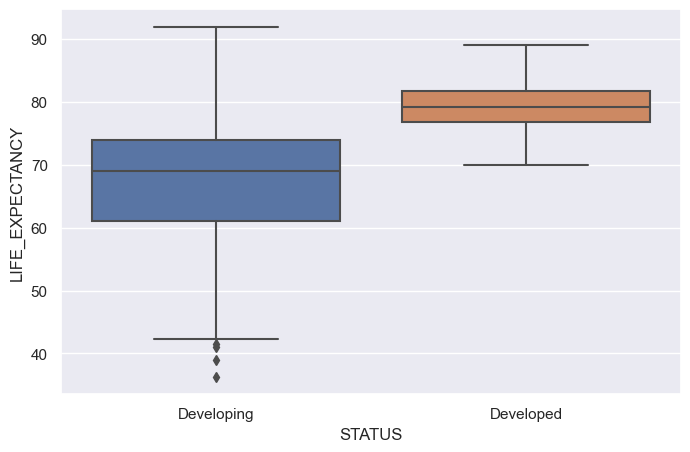

In [36]:
f=plt.figure(figsize=(8,5))
sb.boxplot(data=life_filled,x="STATUS",y="LIFE_EXPECTANCY")

#### Life expectancy vs GDP

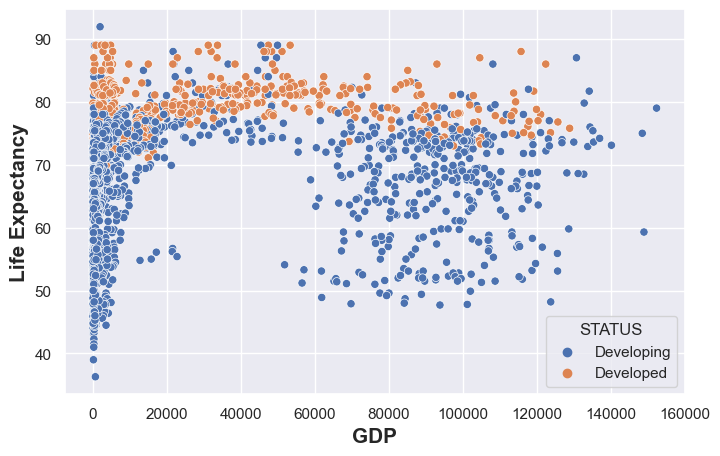

In [37]:
f=plt.figure(figsize=(8,5))
sb.scatterplot(x= life_filled["GDP"], y= life_filled["LIFE_EXPECTANCY"] , hue= life_filled["STATUS"])
plt.ylabel("Life Expectancy", fontsize= 15, fontweight="bold")
plt.xlabel("GDP", fontsize=15, fontweight="bold")
plt.show()

#### Life expectancy vs Population

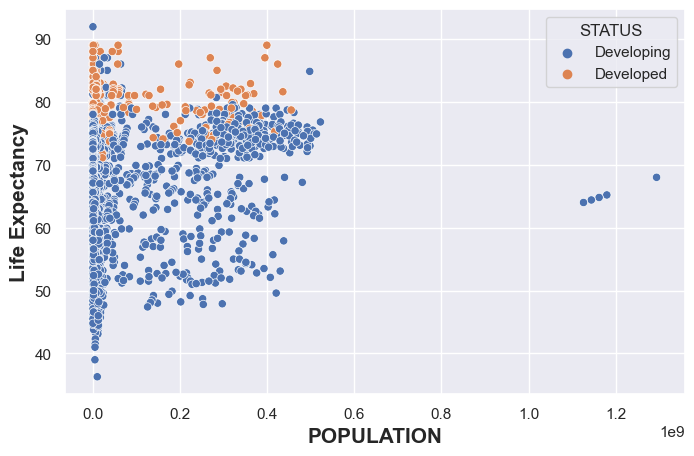

In [40]:
f=plt.figure(figsize=(8,5))
sb.scatterplot(x= life_filled["POPULATION"], y= life_filled["LIFE_EXPECTANCY"] , hue= life_filled["STATUS"])
plt.ylabel("Life Expectancy", fontsize= 15, fontweight="bold")
plt.xlabel("POPULATION", fontsize=15, fontweight="bold")
plt.show()

#### Life expectancy vs BMI


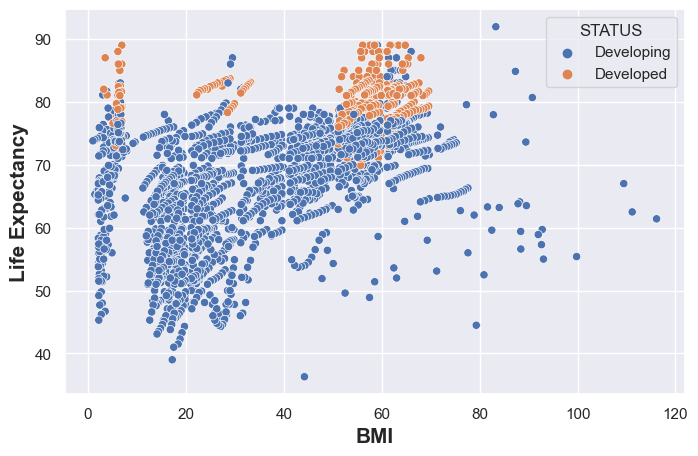

In [42]:
f=plt.figure(figsize=(8,5))
sb.scatterplot(x= life_filled["BMI"], y= life_filled["LIFE_EXPECTANCY"] , hue= life_filled["STATUS"])
plt.ylabel("Life Expectancy", fontsize= 15, fontweight="bold")
plt.xlabel("BMI", fontsize=15, fontweight="bold")
plt.show()

#### Life expectancy vs schooling


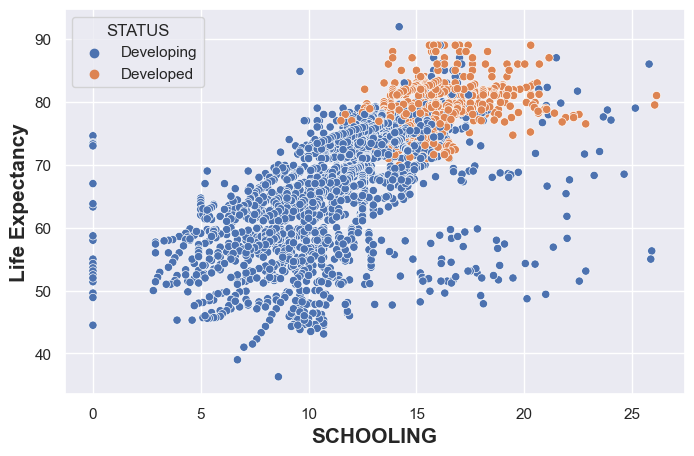

In [43]:
f=plt.figure(figsize=(8,5))
sb.scatterplot(x= life_filled[["SCHOOLING",""]], y= life_filled["LIFE_EXPECTANCY"] , hue= life_filled["STATUS"])
plt.ylabel("Life Expectancy", fontsize= 15, fontweight="bold")
plt.xlabel("SCHOOLING", fontsize=15, fontweight="bold")
plt.show()

#### Life expectancy vs alcohol consumption


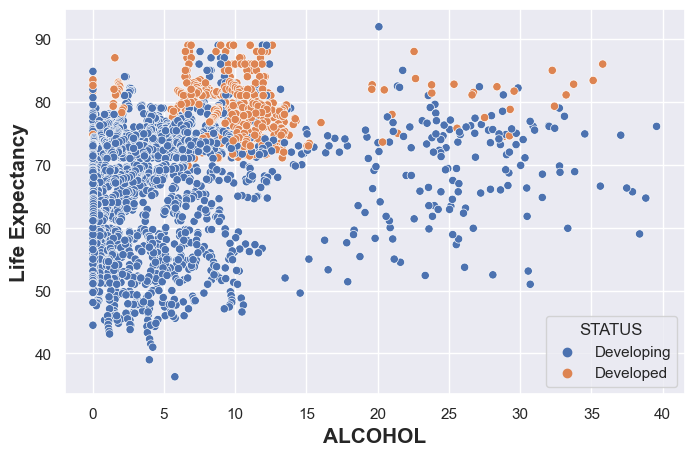

In [45]:
f=plt.figure(figsize=(8,5))
sb.scatterplot(x= life_filled["ALCOHOL"], y= life_filled["LIFE_EXPECTANCY"] , hue= life_filled["STATUS"])
plt.ylabel("Life Expectancy", fontsize= 15, fontweight="bold")
plt.xlabel("ALCOHOL", fontsize=15, fontweight="bold")
plt.show()

In [ ]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(life_agg.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()